In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [111]:
df=pd.read_csv("penguins_size.csv")

In [112]:
#data understanding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


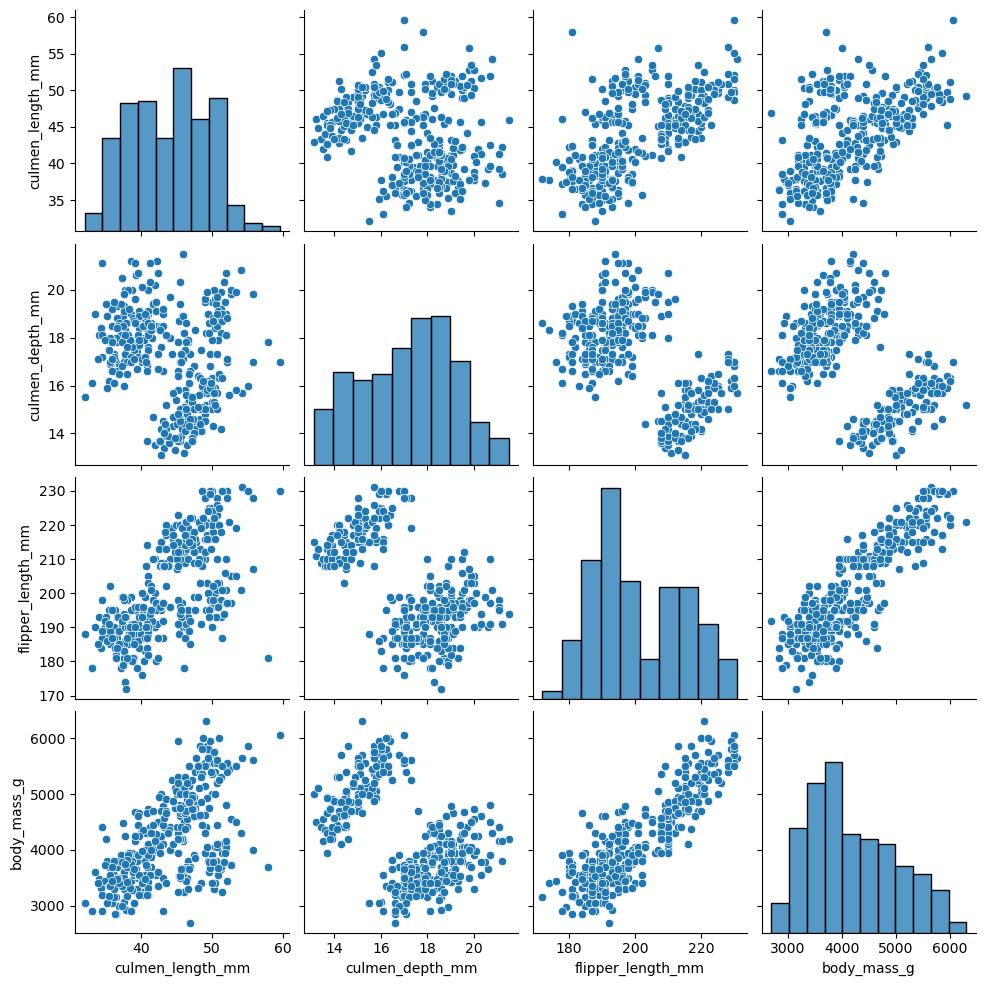

In [113]:
#
sns.pairplot(df)
plt.show()

In [114]:
#Data preprocessing

df.isnull().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [115]:
df=df.dropna()

In [116]:
df.shape

(334, 7)

In [117]:
#Data Wrangling

x=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [118]:
y=df['species']

In [123]:
#Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [125]:
#modelling

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=0)

model.fit(x_train,y_train)

#Predictions

train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

#Evaluation

from sklearn.metrics import accuracy_score

tr_accuracy=accuracy_score(y_train,train_prediction)

te_acuracy=accuracy_score(y_test,test_prediction)

print(tr_accuracy,te_accuracy)

#cross_val_score

from sklearn.model_selection import cross_val_score

cvs=cross_val_score(model,x,y,cv=5).mean()
cvs


1.0 0.9850746268656716


0.9940298507462686

In [127]:
#importance of each feature given by this model

model.feature_importances_

array([0.28496552, 0.21754623, 0.22801535, 0.12451201, 0.10616746,
       0.02843219, 0.00522961, 0.00513164])

In [132]:
pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.284966
culmen_depth_mm,0.217546
flipper_length_mm,0.228015
body_mass_g,0.124512
island_Dream,0.106167
island_Torgersen,0.028432
sex_FEMALE,0.005230
sex_MALE,0.005132


In [136]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

estimator=RandomForestClassifier()

param_grid={'n_estimators':list(range(1,101))}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 12}

In [138]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=0,n_estimators=12)

model.fit(x_train,y_train)

#Predictions

train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

#Evaluation

from sklearn.metrics import accuracy_score

tr_accuracy=accuracy_score(y_train,train_prediction)

te_acuracy=accuracy_score(y_test,test_prediction)

print(tr_accuracy,te_accuracy)

#cross_val_score

from sklearn.model_selection import cross_val_score

cvs=cross_val_score(model,x,y,cv=5).mean()
cvs

1.0 0.9850746268656716


0.9790592492085028